In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import pymc3 as pm

%matplotlib inline

/Users/furnstah/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
model = pm.Model()
with model:
    mu1 = pm.Normal("mu1", mu=0, sd=1, shape=10)


In [3]:
with model:
    step = pm.NUTS()
    trace = pm.sample(2000, tune=1000, init=None, step=step, cores=2)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu1]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:04<00:00, 1333.16draws/s]


In [4]:
trace.stat_names


{'depth',
 'diverging',
 'energy',
 'energy_error',
 'max_energy_error',
 'mean_tree_accept',
 'step_size',
 'step_size_bar',
 'tree_size',
 'tune'}

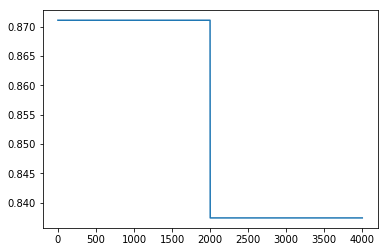

In [5]:
plt.plot(trace['step_size_bar'])


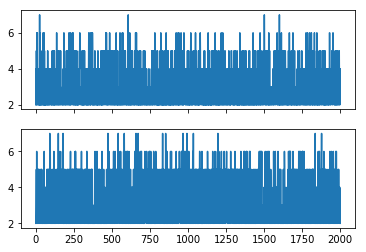

In [6]:
sizes1, sizes2 = trace.get_sampler_stats('depth', combine=False)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
ax1.plot(sizes1)
ax2.plot(sizes2)

/Users/furnstah/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


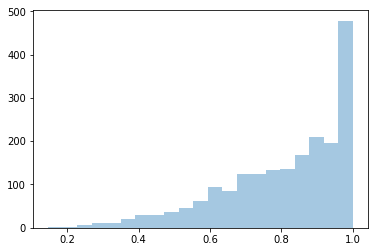

In [7]:
accept = trace.get_sampler_stats('mean_tree_accept', burn=1000)
sb.distplot(accept, kde=False)


In [8]:
accept.mean()


0.8065656776169357

In [9]:
trace['diverging'].nonzero()


(array([], dtype=int64),)

/Users/furnstah/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/furnstah/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


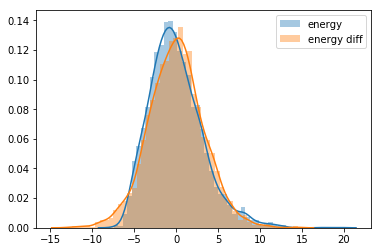

In [10]:
energy = trace['energy']
energy_diff = np.diff(energy)
sb.distplot(energy - energy.mean(), label='energy')
sb.distplot(energy_diff, label='energy diff')
plt.legend()

In [11]:
model = pm.Model()
with model:
    mu1 = pm.Bernoulli("mu1", p=0.8)
    mu2 = pm.Normal("mu2", mu=0, sd=1, shape=10)


In [12]:
with model:
    step1 = pm.BinaryMetropolis([mu1])
    step2 = pm.Metropolis([mu2])
    trace = pm.sample(10000, init=None, step=[step1, step2], cores=2, tune=1000)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>BinaryMetropolis: [mu1]
>Metropolis: [mu2]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:04<00:00, 5114.86draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [13]:
trace.stat_names


{'accept', 'p_jump', 'tune'}

In [14]:
trace.get_sampler_stats('accept')


array([[0.25      , 1.30575434],
       [1.        , 0.01282528],
       [0.25      , 1.03229934],
       ...,
       [0.25      , 1.51037653],
       [0.25      , 0.09492355],
       [0.25      , 0.01042448]])